In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1]:
import warnings 
warnings.filterwarnings('ignore')

# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import xgboost as xgb


from scipy.stats import skew
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from datetime import datetime

%matplotlib inline
print('done')



done


# Import Data

In [3]:
train = pd.read_csv('Successful Enterpreneur projects/train.csv')
test = pd.read_csv('Successful Enterpreneur projects/test.csv')

# Explore the Data

In [4]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [5]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   project_id             108129 non-null  object 
 1   name                   108126 non-null  object 
 2   desc                   108120 non-null  object 
 3   goal                   108129 non-null  float64
 4   keywords               108129 non-null  object 
 5   disable_communication  108129 non-null  bool   
 6   country                108129 non-null  object 
 7   currency               108129 non-null  object 
 8   deadline               108129 non-null  int64  
 9   state_changed_at       108129 non-null  int64  
 10  created_at             108129 non-null  int64  
 11  launched_at            108129 non-null  int64  
 12  backers_count          108129 non-null  int64  
 13  final_status           108129 non-null  int64  
dtypes: bool(1), float64(1), int64(6), ob

In [7]:
train.columns

Index(['project_id', 'name', 'desc', 'goal', 'keywords',
       'disable_communication', 'country', 'currency', 'deadline',
       'state_changed_at', 'created_at', 'launched_at', 'backers_count',
       'final_status'],
      dtype='object')

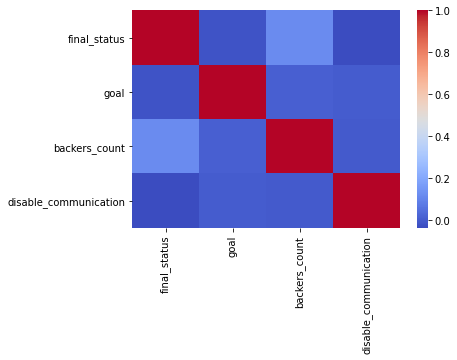

In [8]:
g = sns.heatmap(train[['final_status', 'goal', 'country', 'currency', 'backers_count', 'disable_communication']].corr(), cmap = 'coolwarm')

0    73568
1    34561
Name: final_status, dtype: int64

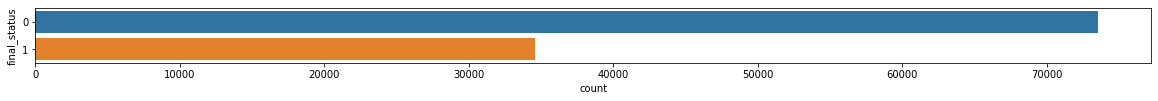

In [9]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='final_status', data=train)
train.final_status.value_counts()

In [10]:
# Missing Values
train.isnull().sum()

project_id               0
name                     3
desc                     9
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

### Goal vs Final Status

In [11]:
def comparing(train, variable1, variable2):
    print(train[[variable1, variable2]][train[variable2].isnull() == False].groupby([variable1], as_index=False).mean().sort_values(by=variable2, ascending=False))
    g = sns.FacetGrid(train, col=variable2).map(sns.distplot, variable1)

In [12]:
def counting_values(train, variable1, variable2):
    return train[[variable1, variable2]][train[variable2].isnull()==False].groupby([variable1], as_index=False).mean().sort_values(by=variable2, ascending=False)

              goal  final_status
0     1.000000e-02           1.0
843   2.253000e+03           1.0
850   2.280000e+03           1.0
856   2.325000e+03           1.0
857   2.333000e+03           1.0
...            ...           ...
1689  7.145000e+03           0.0
1690  7.174000e+03           0.0
1693  7.219000e+03           0.0
1694  7.230000e+03           0.0
3566  1.000000e+08           0.0

[3567 rows x 2 columns]


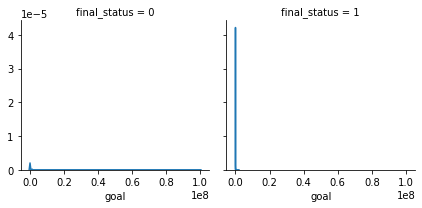

In [13]:
comparing(train, 'goal', 'final_status')

In [14]:
train['log_goal'] = np.log10(train['goal'])

In [15]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.301030
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,2.477121
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,1.477121
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,2.698970
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,3.301030


### log_goal vs Final Status

      log_goal  final_status
0    -2.000000           1.0
843   3.352761           1.0
850   3.357935           1.0
856   3.366423           1.0
857   3.367915           1.0
...        ...           ...
1689  3.854002           0.0
1690  3.855761           0.0
1693  3.858477           0.0
1694  3.859138           0.0
3566  8.000000           0.0

[3567 rows x 2 columns]


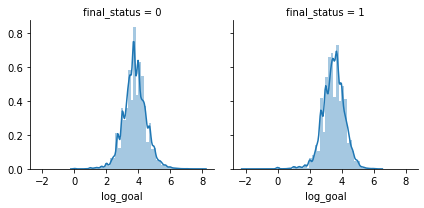

In [16]:
comparing(train, 'log_goal', 'final_status')

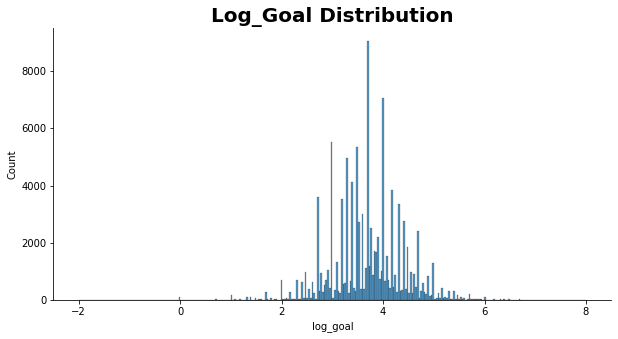

In [17]:
fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(data=train, x='log_goal').set_title('Log_Goal Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

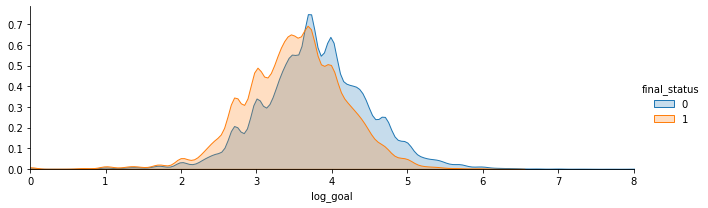

In [18]:
facet = sns.FacetGrid(train, hue='final_status', aspect=3)
facet.map(sns.kdeplot, 'log_goal', shade=True)
facet.set(xlim=(0, train['log_goal'].max()))
facet.add_legend()

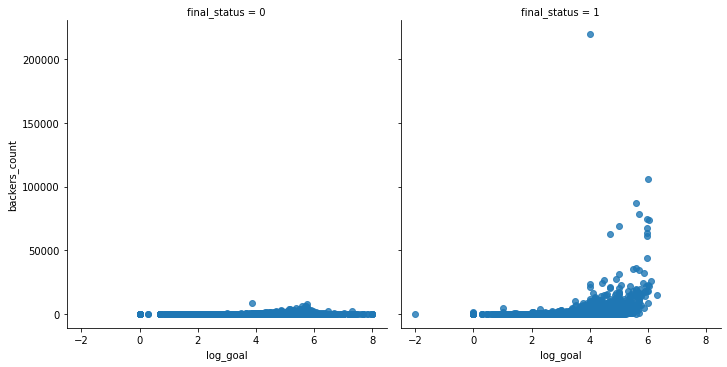

In [19]:
sns.lmplot(x = 'log_goal', y = 'backers_count', col ='final_status', data = train, fit_reg = False)

Text(0.5, 1.0, 'Unsuccesful Kickstarters rarely find backers with goals above $1 Million')

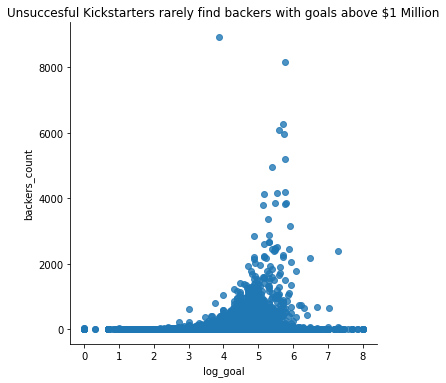

In [20]:
sns.lmplot(x = 'log_goal', y = 'backers_count', data = train[train['final_status'] == 0], fit_reg = False)
plt.title('Unsuccesful Kickstarters rarely find backers with goals above $1 Million')

Text(0.5, 1.0, 'Successfull Kickstarters')

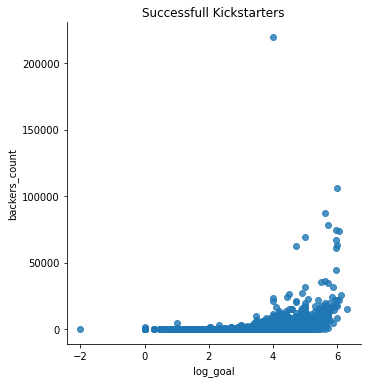

In [21]:
sns.lmplot(x = 'log_goal', y = 'backers_count', data = train[train['final_status'] == 1], fit_reg = False)
plt.title('Successfull Kickstarters')

In [22]:
#  Projects with goal over $ 1Million
train[train['goal']>1000000].shape 

(232, 15)

In [23]:
# Funded projects with over $1Million goal
train[train['goal']>1000000]['final_status'].value_counts() 

0    228
1      4
Name: final_status, dtype: int64

In [24]:
#percent of projects funded with goal over $1M
percent_over_1M = (4/232)*100
percent_over_1M

1.7241379310344827

In [25]:
#  Projects with goal < $ 1Million
train[train['goal']<1000000].shape 

(107811, 15)

In [26]:
# Funded projects with < $1Million goal
train[train['goal']<1000000]['final_status'].value_counts() 

0    73258
1    34553
Name: final_status, dtype: int64

In [27]:
percent = (34553/107811)*100
percent

32.04960532784224

#### Goals less than $1M got funded

Text(0.5, 1.0, 'Successful and Unsuccessful Kickstarters average goal comparision')

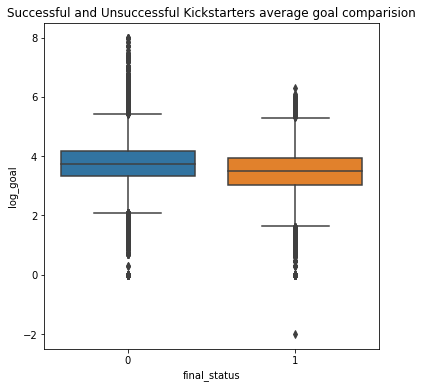

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='final_status', y = 'log_goal', data = train)
plt.title('Successful and Unsuccessful Kickstarters average goal comparision')


In [29]:
#train.loc[train['log_goal'] <= 5 , 'backers_count'] = 1
#train.loc[train['log_goal'] > 5 , 'backers_count'] = 0

In [30]:
train.loc[train['log_goal'] <= 1  , 'log_goal'] = 0 
train.loc[(train['log_goal'] >1 ) & (train['log_goal']<= 3) , 'log_goal'] = 1  
train.loc[train['log_goal'] > 3 & (train['log_goal']<=5), 'log_goal'] = 2  
train.loc[train['log_goal'] > 5 , 'log_goal'] = 3  

In [31]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,1.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,1.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,1.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,2.0


### Country vs Final_status

In [32]:
country = train.groupby('country')['final_status'].sum()
country

country
AU      343
CA      837
DE        0
DK       44
GB     2510
IE       23
NL       88
NO       18
NZ       80
SE       45
US    30573
Name: final_status, dtype: int64

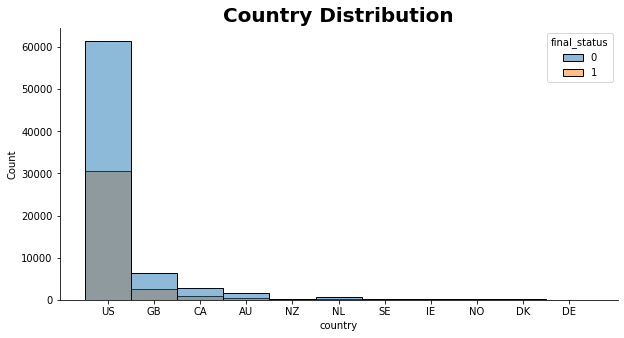

In [33]:
fig, axs = plt.subplots(figsize=(10,5))
sns.histplot(data=train, x='country', hue='final_status').set_title('Country Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

<AxesSubplot:xlabel='country', ylabel='count'>

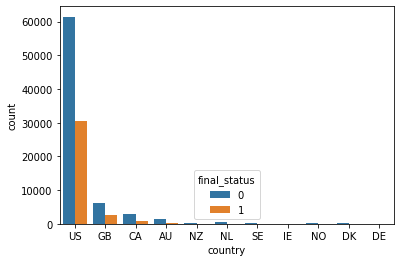

In [34]:
sns.countplot(data=train, x = 'country', hue='final_status')

### Currency vs Final Status

In [35]:
currency = train.groupby('currency')['final_status'].sum()
currency

currency
AUD      343
CAD      837
DKK       44
EUR      111
GBP     2510
NOK       18
NZD       80
SEK       45
USD    30573
Name: final_status, dtype: int64

<AxesSubplot:xlabel='currency', ylabel='count'>

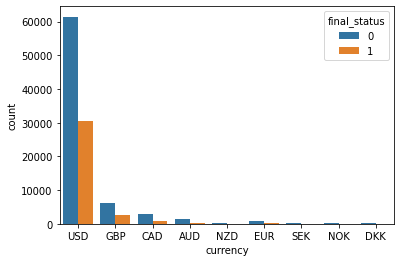

In [36]:
sns.countplot(data=train, x = 'currency', hue='final_status')

### Name vs Final Status

In [37]:
train['NameLen'] = train['name'].str.len()
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.0,19.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,1.0,76.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,1.0,13.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,1.0,30.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,2.0,38.0


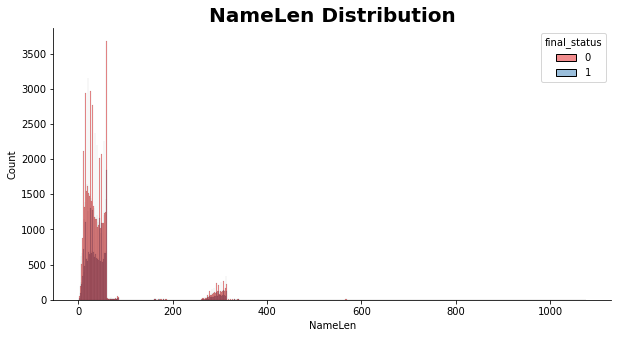

In [38]:
fig, axs = plt.subplots(figsize=(10,5))
sns.set_palette('Set1')
sns.histplot(data=train, x='NameLen', hue='final_status').set_title('NameLen Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

<AxesSubplot:xlabel='NameLen', ylabel='count'>

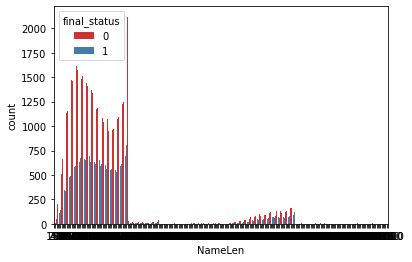

In [39]:
sns.countplot(data=train, x='NameLen', hue='final_status')

Bins
1. 0-150
2. 150-250
3. 250-400
4. greater than 400


In [40]:
#NameLen bins
train.loc[train['NameLen'] > 0 & (train['NameLen'] <= 150) , 'NameLen'] = 0 
train.loc[(train['NameLen'] > 150) & (train['NameLen']<= 250) , 'NameLen'] = 1  
train.loc[train['NameLen'] > 250 & (train['NameLen']<=400), 'NameLen'] = 2  
train.loc[train['NameLen'] > 400 , 'NameLen'] = 3  

### Keyword vs Final Status

In [41]:
train.keywords.unique()[0]

'drawing-for-dollars'

In [42]:
train.keywords.unique()[2021]

'devil-may-care'

In [43]:
train['keywordsLen'] = train['keywords'].str.len()
train

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen,keywordsLen
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.0,0.0,19
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,1.0,0.0,74
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,1.0,0.0,12
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,1.0,0.0,29
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,2.0,0.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108124,kkst542772509,Custom Wearable Art,Sacred geometry art and custom clothing. Embro...,2000.0,custom-wearable-art,False,US,USD,1433095651,1433095654,1429382307,1430503651,3,0,2.0,0.0,19
108125,kkst615785942,Painted Modern Wall art Mid-century! $100 for...,I want to create pieces very similar to this o...,15000.0,zacharys-art-project,False,US,USD,1433096040,1433096041,1428339909,1428344094,1,0,2.0,0.0,20
108126,kkst1421442073,Creating High Quality Art Prints from the Arti...,I am seeking to produce prints to promote my r...,320.0,creating-high-quality-art-prints-from-the-arti...,False,US,USD,1433096334,1433096337,1430420564,1430504334,11,1,1.0,0.0,50
108127,kkst2022543055,back to basics,A self sustaining homestead with organic produ...,35000.0,back-to-basics-2,False,US,USD,1433096580,1433096584,1430072594,1430421727,0,0,2.0,0.0,16


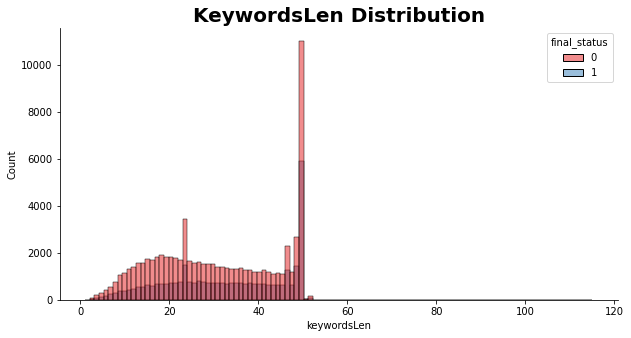

In [44]:
fig, axs = plt.subplots(figsize=(10,5))
sns.set_palette('Set1')
sns.histplot(data=train, x='keywordsLen', hue='final_status').set_title('KeywordsLen Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

In [45]:
train.keywordsLen.describe()

count    108129.000000
mean         31.655134
std          13.726243
min           1.000000
25%          20.000000
50%          31.000000
75%          45.000000
max         115.000000
Name: keywordsLen, dtype: float64

### Desc vs Final Status

In [46]:
train['descLen'] = train['desc'].str.len()
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen,keywordsLen,descLen
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1,1.0,0.0,19,134.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0,1.0,0.0,74,137.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0,1.0,0.0,12,385.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1,1.0,0.0,29,131.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0,2.0,0.0,38,384.0


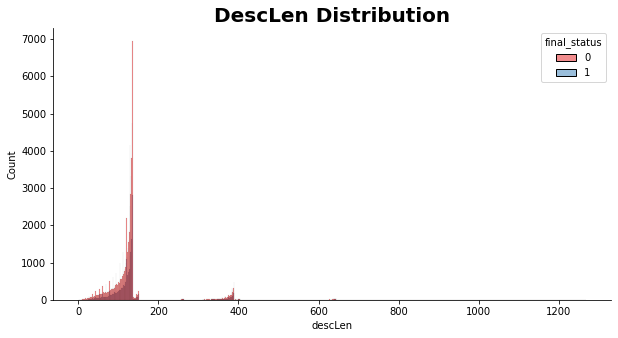

In [47]:
fig, axs = plt.subplots(figsize=(10,5))
sns.set_palette('Set1')
sns.histplot(data=train, x='descLen', hue='final_status').set_title('DescLen Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

In [48]:
train.descLen.describe()

count    108120.000000
mean        134.006067
std          79.371327
min           1.000000
25%         106.000000
50%         126.000000
75%         133.000000
max        1268.000000
Name: descLen, dtype: float64

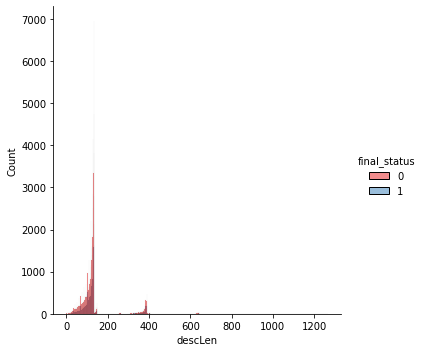

In [49]:
sns.displot(x='descLen', hue='final_status', data=train)

Bins
1. 0-200
2. 200-300
3. 300-400
4. greater than 400

In [50]:
#descLen bins    
train.loc[train['descLen'] > 0 & (train['descLen'] <= 200) , 'descLen'] = 0 
train.loc[(train['descLen'] > 200) & (train['descLen']<= 300) , 'descLen'] = 1  
train.loc[train['descLen'] > 300 & (train['descLen']<=400), 'descLen'] = 2  
train.loc[train['descLen'] > 400 , 'descLen'] = 3  

### Time duration to launch

In [51]:
# Convert UNIX time format to Standard time format
date_time = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
for i in date_time:
    train[i] = train[i].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [52]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen,keywordsLen,descLen
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 12:29:59,2009-05-03 12:30:17,2009-04-25 00:45:07,2009-04-25 01:22:03,3,1,1.0,0.0,19,0.0
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-16 04:40:00,2009-05-16 05:30:18,2009-04-29 04:40:24,2009-04-29 08:56:32,2,0,1.0,0.0,74,0.0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-23 02:56:00,2009-05-23 03:00:18,2009-05-13 02:56:53,2009-05-13 03:09:58,0,0,1.0,0.0,12,0.0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 05:39:00,2009-05-29 05:45:21,2009-04-29 05:39:55,2009-04-29 06:28:50,18,1,1.0,0.0,29,0.0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 17:08:00,2009-05-31 17:15:17,2009-05-01 17:08:34,2009-05-01 17:52:21,1,0,2.0,0.0,38,0.0


In [53]:
# Duration in weeks
def Duration(d):
    launch = datetime.strptime(d[0], '%Y-%m-%d %H:%M:%S')
    deadline = datetime.strptime(d[1], '%Y-%m-%d %H:%M:%S')
    duration = deadline-launch
    weekDifference = int(duration.total_seconds()/(3600*24*7))
    return weekDifference
train['duration'] = train[['launched_at', 'deadline']].apply(lambda d: Duration(d), axis=1)

In [54]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen,keywordsLen,descLen,duration
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 12:29:59,2009-05-03 12:30:17,2009-04-25 00:45:07,2009-04-25 01:22:03,3,1,1.0,0.0,19,0.0,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-16 04:40:00,2009-05-16 05:30:18,2009-04-29 04:40:24,2009-04-29 08:56:32,2,0,1.0,0.0,74,0.0,2
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-23 02:56:00,2009-05-23 03:00:18,2009-05-13 02:56:53,2009-05-13 03:09:58,0,0,1.0,0.0,12,0.0,1
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 05:39:00,2009-05-29 05:45:21,2009-04-29 05:39:55,2009-04-29 06:28:50,18,1,1.0,0.0,29,0.0,4
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 17:08:00,2009-05-31 17:15:17,2009-05-01 17:08:34,2009-05-01 17:52:21,1,0,2.0,0.0,38,0.0,4


In [55]:
train.duration.describe()

count    108129.000000
mean          4.487834
std           1.797238
min           0.000000
25%           4.000000
50%           4.000000
75%           5.000000
max          13.000000
Name: duration, dtype: float64

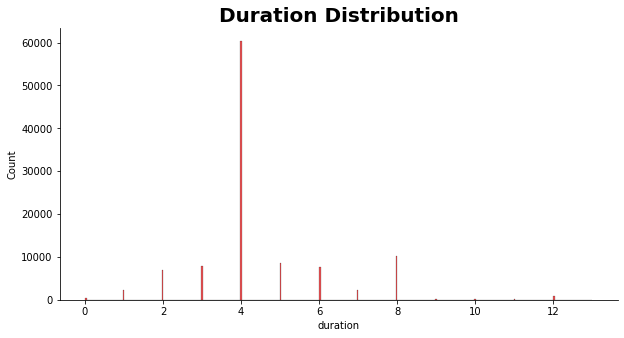

In [56]:
fig, axs = plt.subplots(figsize=(10,5))
sns.set_palette('Set1')
sns.histplot(data=train, x='duration').set_title('Duration Distribution', fontdict={'fontsize':20
                                                                                   , 'fontweight':'bold'});
sns.despine()

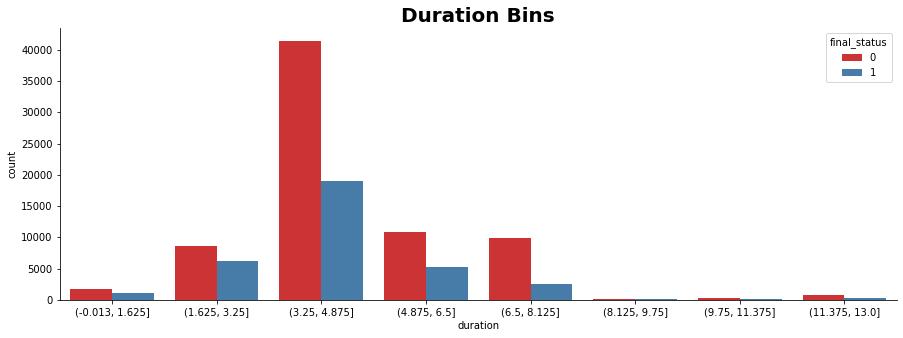

In [57]:
auxlog_goal = pd.cut(train['duration'], 8)
fig, axs = plt.subplots(figsize=(15,5))
sns.countplot(x=auxlog_goal, hue='final_status', data=train).set_title('Duration Bins', fontdict={'fontsize':20
                                                                                                 , 'fontweight': 'bold'})
sns.despine()

In [58]:
#Duration bins   
train.loc[train['duration'] >= 2 , 'duration'] = 0
train.loc[train['duration'] > 2 & (train['duration'] <= 4) , 'duration'] = 1  
train.loc[train['duration'] > 4 & (train['duration']<= 6) , 'duration'] = 2  
train.loc[train['duration'] > 6 & (train['duration']<=8), 'duration'] = 3   
train.loc[train['duration'] > 8 , 'duration'] = 4   

### Disable Communication vs Final Status

In [59]:
train.disable_communication.describe()

count     108129
unique         2
top        False
freq      107806
Name: disable_communication, dtype: object

<AxesSubplot:xlabel='disable_communication', ylabel='count'>

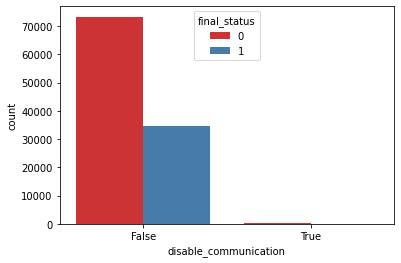

In [60]:
sns.countplot(data = train, x = 'disable_communication', hue= 'final_status')

In [61]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status,log_goal,NameLen,keywordsLen,descLen,duration
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,2009-05-03 12:29:59,2009-05-03 12:30:17,2009-04-25 00:45:07,2009-04-25 01:22:03,3,1,1.0,0.0,19,0.0,3
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,2009-05-16 04:40:00,2009-05-16 05:30:18,2009-04-29 04:40:24,2009-04-29 08:56:32,2,0,1.0,0.0,74,0.0,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,2009-05-23 02:56:00,2009-05-23 03:00:18,2009-05-13 02:56:53,2009-05-13 03:09:58,0,0,1.0,0.0,12,0.0,3
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,2009-05-29 05:39:00,2009-05-29 05:45:21,2009-04-29 05:39:55,2009-04-29 06:28:50,18,1,1.0,0.0,29,0.0,0
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,2009-05-31 17:08:00,2009-05-31 17:15:17,2009-05-01 17:08:34,2009-05-01 17:52:21,1,0,2.0,0.0,38,0.0,0


Features 
1. NameLen 
2. descLen
3. log_goal
4. country
5. currency
6. duration
7. backers_count  X
8. disable_communication  X

# Test Data

In [62]:
# log_goal
test['log_goal'] = np.log10(test['goal'])

In [63]:
test.insert(loc=12, column='backers_count', value=0)

In [64]:
#test.loc[test['log_goal'] <= 5 , 'backers_count'] = 1
#test.loc[test['log_goal'] > 5 , 'backers_count'] = 0
    

In [65]:
test.loc[test['log_goal'] <= 1  , 'log_goal'] = 0 
test.loc[test['log_goal'] >1  & (test['log_goal']<= 3) , 'log_goal'] = 1  
test.loc[test['log_goal'] > 3 & (test['log_goal']<=5), 'log_goal'] = 2  
test.loc[test['log_goal'] > 5 , 'log_goal'] = 3  

In [66]:
test.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,log_goal
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585,0,1.0
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620,0,1.0
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128,0,1.0
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518,0,1.0
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890,0,1.0


In [67]:
# Name length
test['NameLen'] = test['name'].str.len()

In [68]:
#NameLen bins
test.loc[test['NameLen'] > 0 & (test['NameLen'] <= 150) , 'NameLen'] = 0 
test.loc[(test['NameLen'] > 150) & (test['NameLen']<= 250) , 'NameLen'] = 1  
test.loc[test['NameLen'] > 250 & (test['NameLen']<=400), 'NameLen'] = 2  
test.loc[test['NameLen'] > 400 , 'NameLen'] = 3  

In [69]:
# keywords length
test['keywordsLen'] = test['keywords'].str.len()

In [70]:
#desc length
test['descLen'] = test['desc'].str.len()

In [71]:
#descLen bins     
test.loc[test['descLen'] > 0 & (test['descLen'] <= 200) , 'descLen'] = 0  
test.loc[test['descLen'] > 200 & (test['descLen']<= 300) , 'descLen'] = 1  
test.loc[test['descLen'] > 300 & (test['descLen']<=400), 'descLen'] = 2  
test.loc[test['descLen'] > 400, 'descLen'] = 3 

In [72]:
# Convert UNIX time format to Standard time format
date_time = ['deadline', 'state_changed_at', 'created_at', 'launched_at']
for i in date_time:
    test[i] = test[i].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [73]:
# Duration in weeks

test['duration'] = test[['launched_at', 'deadline']].apply(lambda d: Duration(d), axis=1)

In [74]:
#Duration bins   
test.loc[test['duration'] >= 2 , 'duration'] = 0
test.loc[test['duration'] > 2 & (test['duration'] <= 4) , 'duration'] = 1  
test.loc[test['duration'] > 4 & (test['duration']<= 6) , 'duration'] = 2  
test.loc[test['duration'] > 6 & (test['duration']<=8), 'duration'] = 3   
test.loc[test['duration'] > 8 , 'duration'] = 4   

In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63465 entries, 0 to 63464
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   project_id             63465 non-null  object 
 1   name                   63465 non-null  object 
 2   desc                   63461 non-null  object 
 3   goal                   63465 non-null  float64
 4   keywords               63465 non-null  object 
 5   disable_communication  63465 non-null  bool   
 6   country                63465 non-null  object 
 7   currency               63465 non-null  object 
 8   deadline               63465 non-null  object 
 9   state_changed_at       63465 non-null  object 
 10  created_at             63465 non-null  object 
 11  launched_at            63465 non-null  object 
 12  backers_count          63465 non-null  int64  
 13  log_goal               63465 non-null  float64
 14  NameLen                63465 non-null  int64  
 15  ke

In [76]:
test.log_goal.astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
63460    1
63461    1
63462    1
63463    1
63464    1
Name: log_goal, Length: 63465, dtype: int64

# Model Selection

In [77]:
my_features = ['NameLen', 'keywordsLen','descLen', 'backers_count', 'country', 'currency', 'duration', 'log_goal']

In [78]:
dtrain = train[my_features].copy()
dtest = test[my_features].copy()

In [79]:
y = train.final_status
df_train = dtrain
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=0.2, random_state=0)
categorical_cols = [cname for cname in df_train.columns if
                    df_train[cname].nunique() < 10 and 
                    df_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in df_train.columns if 
                df_train[cname].dtype in ['int64', 'float64']]

# Preprocessing

In [80]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#Feature Scaling
sc = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [81]:
Results = pd.DataFrame({'Model': [], 'Accuracy Score': []})

## LogisticRegression

In [82]:
# Define model
lrc = LogisticRegression()


# Bundle preprocessing and modeling code in a pipeline
lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sc',StandardScaler()),
                      ('model', lrc)
])

# Preprocessing of training data, fit model 
lr.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predsLR = lr.predict(X_valid)

print('Accuracy:', accuracy_score(y_valid, predsLR))
print('CR:', classification_report(y_valid, predsLR))
print('CM:',confusion_matrix(y_valid, predsLR))

res = pd.DataFrame({'Model': ['LogisticRegression'],
                    'Accuracy Score': [accuracy_score(y_valid, predsLR)]})
Results = Results.append(res)

Accuracy: 0.7714787755479515
CR:               precision    recall  f1-score   support

           0       0.77      0.95      0.85     14824
           1       0.79      0.38      0.51      6802

    accuracy                           0.77     21626
   macro avg       0.78      0.66      0.68     21626
weighted avg       0.77      0.77      0.74     21626

CM: [[14126   698]
 [ 4244  2558]]


## DecisionTree

In [83]:
# Define model
dtc = DecisionTreeClassifier()


# Bundle preprocessing and modeling code in a pipeline
dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sc',StandardScaler()),
                      ('model', dtc)
])

# Preprocessing of training data, fit model 
dt.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predsDT = dt.predict(X_valid)

print('Accuracy:', accuracy_score(y_valid, predsDT))
print('CR:', classification_report(y_valid, predsDT))
print('CM:',confusion_matrix(y_valid, predsDT))

res = pd.DataFrame({'Model': ['DecisionTree'],
                    'Accuracy Score': [accuracy_score(y_valid, predsDT)]})
Results = Results.append(res)

Accuracy: 0.7960325534079349
CR:               precision    recall  f1-score   support

           0       0.83      0.88      0.85     14824
           1       0.70      0.62      0.66      6802

    accuracy                           0.80     21626
   macro avg       0.77      0.75      0.76     21626
weighted avg       0.79      0.80      0.79     21626

CM: [[13000  1824]
 [ 2587  4215]]


## RandomForest

In [84]:
# Define model
model = RandomForestClassifier(n_estimators=100, random_state=0,criterion='entropy')

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sc',StandardScaler()),
                      ('model', model)
])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, preds))
print('CR:', classification_report(y_valid, preds))
print('CM:',confusion_matrix(y_valid, preds))

res = pd.DataFrame({'Model': ['RandomForest'],
                    'Accuracy Score': [accuracy_score(y_valid, preds)]})
Results = Results.append(res)

Accuracy: 0.8010265421252196
CR:               precision    recall  f1-score   support

           0       0.85      0.86      0.86     14824
           1       0.69      0.67      0.68      6802

    accuracy                           0.80     21626
   macro avg       0.77      0.77      0.77     21626
weighted avg       0.80      0.80      0.80     21626

CM: [[12743  2081]
 [ 2222  4580]]


## KNN

In [85]:
# Define model
knnc = KNeighborsClassifier()


# Bundle preprocessing and modeling code in a pipeline
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sc',StandardScaler()),
                      ('model', knnc)
])

# Preprocessing of training data, fit model 
knn.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predsKNN = knn.predict(X_valid)

print('Accuracy:', accuracy_score(y_valid, predsKNN))
print('CR:', classification_report(y_valid, predsKNN))
print('CM:',confusion_matrix(y_valid, predsKNN))

res = pd.DataFrame({'Model': ['KNN'],
                    'Accuracy Score': [accuracy_score(y_valid, predsKNN)]})
Results = Results.append(res)

Accuracy: 0.8045408304818275
CR:               precision    recall  f1-score   support

           0       0.86      0.85      0.86     14824
           1       0.69      0.70      0.69      6802

    accuracy                           0.80     21626
   macro avg       0.77      0.78      0.77     21626
weighted avg       0.81      0.80      0.80     21626

CM: [[12668  2156]
 [ 2071  4731]]


## SVM

In [86]:
# Define model
sv = SVC()


# Bundle preprocessing and modeling code in a pipeline
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('sc',StandardScaler()),
                      ('model', sv)
])

# Preprocessing of training data, fit model 
svc.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predssvc = svc.predict(X_valid)

print('Accuracy:', accuracy_score(y_valid, predssvc))
print('CR:', classification_report(y_valid, predssvc))
print('CM:',confusion_matrix(y_valid, predssvc))

res = pd.DataFrame({'Model': ['SVM'],
                    'Accuracy Score': [accuracy_score(y_valid, predssvc)]})
Results = Results.append(res)

Accuracy: 0.75700545639508
CR:               precision    recall  f1-score   support

           0       0.76      0.95      0.84     14824
           1       0.76      0.33      0.46      6802

    accuracy                           0.76     21626
   macro avg       0.76      0.64      0.65     21626
weighted avg       0.76      0.76      0.72     21626

CM: [[14117   707]
 [ 4548  2254]]


## XGB

In [87]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators= 200, learning_rate = 0.1, max_depth=2, min_child_weight = 1,nthread=4, seed=27,subsample=0.8,colsample_bytree=0.9,max_delta_step=0,
                         objective= 'multi:softmax',gamma = 0,reg_alpha=0.001,reg_lambda=0.5, eval_metric='auc',random_state=0, num_class= 6)
# Bundle preprocessing and modeling code in a pipeline
xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model_xgb', model_xgb)
])

# Preprocessing of training data, fit model 
xgb.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['NameLen', 'keywordsLen',
                                                   'descLen', 'backers_count',
                                                   'duration', 'log_goal']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['currency'])])),
                ('model_xgb',
                 XGBClassifier(base.

In [88]:
# Preprocessing of validation data, get predictions
predictions = xgb.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, predictions))
print('CR:', classification_report(y_valid, predictions))
print('CM:',confusion_matrix(y_valid, predictions))

res = pd.DataFrame({'Model': ['XGB'],
                    'Accuracy Score': [accuracy_score(y_valid, predictions)]})
Results = Results.append(res)

Accuracy: 0.830343105521132
CR:               precision    recall  f1-score   support

           0       0.90      0.84      0.87     14824
           1       0.70      0.80      0.75      6802

    accuracy                           0.83     21626
   macro avg       0.80      0.82      0.81     21626
weighted avg       0.84      0.83      0.83     21626

CM: [[12510  2314]
 [ 1355  5447]]


# Results

In [89]:
Results

,Model,Accuracy Score
0,LogisticRegression,0.771479
0,DecisionTree,0.796033
0,RandomForest,0.801027
0,KNN,0.804541
0,SVM,0.757005
0,XGB,0.830343


References:
1. https://www.kaggle.com/phuongpm/kickstarter-funding
2. https://www.kaggle.com/tkkanno/what-goal-should-i-set-for-my-kickstarter